### 1. 영상필터링

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
# cv2.filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]]) -> dst
# src: 입력영상
# ddepth: 출력영상의 타입 (cv2.CV_8U, cv2.CV_32F, cv2.CV_64F), 
#     -1 => 입력영상과 같은 타입
# kernel: filter 행렬, 실수형
# anchor: (-1, -1)  필터의 중앙점
# delta:   더할 값
# borderType: 가장자리 픽셀확장 방식
# dst: 출력영상

# blur(src, ksize[, dst[, anchor[, borderType]]]) -> dst
# src: 입력영상
# ksize: mean filter kernel size

In [2]:
## 영역처리, 영상 필터링, Convolution

src = cv2.imread("./fig/blue_eyes.png", cv2.IMREAD_REDUCED_COLOR_2)

kernel_3 = np.ones((3, 3), dtype = np.float64)/9.
dst_kernel = cv2.filter2D(src, -1, kernel_3)

dst_blur = cv2.blur(src, (3, 3))

cv2.imshow('src', src)
cv2.imshow('dst_kernel', dst_kernel)
cv2.imshow("dst_blur", dst_blur)

cv2.waitKey()
cv2.destroyAllWindows()

In [3]:
src = cv2.imread("./fig/blue_eyes.png", cv2.IMREAD_REDUCED_COLOR_2)
cv2.imshow("src", src)

for ksize in (3, 5, 7, 9, 12, 15, 23):
    dst = cv2.blur(src, (ksize, ksize))
    text = '{} x {}'.format(ksize, ksize)
    cv2.putText(dst, text, (20, 30), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)

    cv2.imshow('mean filter', dst)
    cv2.waitKey()

cv2.destroyAllWindows()

### 2. 가우시안 필터

In [ ]:
# GaussianBlur(src, (ksize), sigmaX[, dst[, sigmaY[, borderType]]]) -> dst
# src: 입력영상
# ksize: mean filter kernel size, (0, 0) 자동으로 결정
# sigmaX:  gaussian x 방향의 sigma
# sigmaY:  gaussian y 방향의 sigma

In [4]:
## 가우시안 필터

src = cv2.imread("./fig/blue_eyes.png", cv2.IMREAD_COLOR)

dst_Gaussian1 = cv2.GaussianBlur(src, (0, 0), 1)
dst_mean = cv2.blur(src, (5,5))
# dst_Gaussian2 = cv2.GaussianBlur(src, (0, 0), 2)
# dst_Gaussian3 = cv2.GaussianBlur(src, (0, 0), 3)

cv2.imshow('src', src)
cv2.imshow("Gaussian1", dst_Gaussian1)
cv2.imshow("dst_mean", dst_mean)
# cv2.imshow("Gaussian2", dst_Gaussian2)
# cv2.imshow("Gaussianㅗ3", dst_Gaussian3)

cv2.waitKey()
cv2.destroyAllWindows()

### 3. 사프닝 필터링

In [5]:
## Sharpening filter

src = cv2.imread("./fig/blue_eyes.png", cv2.IMREAD_REDUCED_COLOR_2)

blr = cv2.GaussianBlur(src, (0, 0), 1)
blr2 = cv2.GaussianBlur(src, (0, 0), 2)
blr3 = cv2.GaussianBlur(src, (0, 0), 3)

dst = cv2.addWeighted(src, 2, blr, -1, 0.0)
dst2 = cv2.addWeighted(src, 2, blr2, -1, 0.0)
dst3 = cv2.addWeighted(src, 2, blr3, -1, 0.0)

cv2.imshow('src', src)
cv2.imshow("blr", blr)
cv2.imshow("sharpening1", dst)
cv2.imshow("sharpening2", dst2)
cv2.imshow("sharpening3", dst3)

cv2.waitKey()
cv2.destroyAllWindows()

# [[ 0. -1.  0.]
#  [-1.  5. -1.]
#  [ 0. -1.  0.]]

# [[-0.2 -0.8 -0.2]
#  [-0.8  5.  -0.8]
#  [-0.2 -0.8 -0.2]]

# src = cv2.imread('blue_eyes.png', cv2.IMREAD_REDUCED_COLOR_2)
# kernel = np.ones((3, 3), dtype = np.float64)*-1
# kernel[1,1] = 9
# #print(kernel)
# dst = cv2.filter2D(src, -1, kernel)
# cv2_imshow(src)
# cv2_imshow(dst)

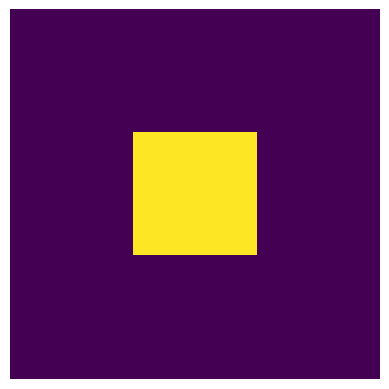

In [6]:
## sharpen filter
src = cv2.imread("./fig/blue_eyes.png")

kernel_3 = np.ones((3, 3), dtype = np.float64)*-.5
kernel_3[1, 1] = 5

dst_kernel = cv2.filter2D(src, -1, kernel_3)

cv2.imshow('src', src)
cv2.imshow('dst_kernel', dst_kernel)

plt.imshow(kernel_3)
plt.axis("off")
plt.show()
# cv2.imshow("dst_blur", dst_blur)

cv2.waitKey()
cv2.destroyAllWindows()

### 4. 중앙값 필터링

In [7]:
## median filter
src = cv2.imread("./fig/blue_eyes.png", cv2.IMREAD_GRAYSCALE)
salt_noise = np.random.choice((0, 255), src.shape, p = (0.99, 0.01)).astype(np.uint8)
pepper_noise = np.random.choice((0, 255), src.shape, p = (0.99, 0.01)).astype(np.uint8)
dst = cv2.add(src, salt_noise)
dst = cv2.subtract(dst, pepper_noise)

dst_median = cv2.medianBlur(dst, 3)
# dst_Gaussian = cv2.GaussianBlur(dst, (0, 0), 1)

cv2.imshow("src", src)
# cv2.imshow("salt_noise", salt_noise)
# cv2.imshow("pepper_noise", pepper_noise)
cv2.imshow("dst", dst)
cv2.imshow("dst_median", dst_median)
# cv2.imshow("dst_Gaussian", dst_Gaussian)


while True:
    if cv2.waitKey() == ord("q"):
        break
    
cv2.destroyAllWindows()

### 5. 양방향 필터 (Bilateral filter)

In [32]:
## 
# bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]]) -> dst
# src: 입력영상
# d: -1로 설정
# sigmaColor: 색공간의 표준편차
# sigmaSpace: 좌표공간의표준편차
# dst:
# borderType: 가장자리 픽셀확장 방식

In [8]:
src = cv2.imread("./fig/blue_eyes.png", cv2.IMREAD_GRAYSCALE)

dst_Gaussian = cv2.GaussianBlur(src, (0, 0), 1. )
dst_Bilateral_5 = cv2.bilateralFilter(src, -1, 5, 10)
dst_Bilateral_20 = cv2.bilateralFilter(src, -1, 20, 10)

cv2.imshow("src", src)
cv2.imshow("Gaussian", dst_Gaussian)
cv2.imshow("Bilateral_5", dst_Bilateral_5)
cv2.imshow("Bilateral_20", dst_Bilateral_20)


cv2.waitKey()
cv2.destroyAllWindows()

### 6. 카툰 필터

In [9]:
## bitwise operator
src1 = np.zeros((256, 256), np.uint8)
cv2.rectangle(src1, (10, 10), (127, 245), 255, -1)
src2 = np.zeros((256, 256), np.uint8)
cv2.circle(src2, (127, 127), 100, 128, -1)

dst1 = cv2.bitwise_and(src1, src2)
dst2 = cv2.bitwise_or(src1, src2)
dst3 = cv2.bitwise_xor(src1, src2)
dst4 = cv2.bitwise_not(src2)

cv2.imshow("src1", src1)
cv2.imshow('src2', src2)
cv2.imshow("AND", dst1)
cv2.imshow("OR", dst2)
cv2.imshow("XOR", dst3)
cv2.imshow("NOT", dst4)

cv2.waitKey()
cv2.destroyAllWindows()

In [10]:
## Cartoon 필터

time = cv2.TickMeter()

src = cv2.imread("./fig/son.jpg")

time.start()

### 연산 구간
for i in range(100):
    blr = cv2.GaussianBlur(src, (0, 0), 2)
    edge = 255 - cv2.Canny(src, 100, 200)
    edge = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)
    dst = cv2.bitwise_and(blr, edge)
###

time.stop()

cv2.imshow("son", src)
cv2.imshow("blr", blr)
cv2.imshow("edge", edge)
cv2.imshow("dst", dst)
print(time.getTimeMilli(), "ms")
time.reset()

cv2.waitKey()
cv2.destroyAllWindows()

276.297 ms


### 7. 영상 이동

In [ ]:
# warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]) -> dst
# src: 입력영상
# M: affine transform matrix (size: 2 x 3)
# dsize: 출력영상 크기, (0, 0) = 입력영상크기로 출력
# borderValue: 값이 없는 영역을 채우는 값, default  = 0

In [11]:
## 영상 이동 (Translation)

src = cv2.imread("./fig/dog.bmp")

## affine matrix
affine = np.array([[1, 0, 50],
                   [0, 1, 200]], np.float32)

print("affine matrix: \n", affine)
# print(affine.dtype)

dst = cv2.warpAffine(src, affine, (0, 0), 
                     borderMode = cv2.BORDER_CONSTANT, 
                     borderValue=(255, 255, 255))

# dst = cv2.warpAffine(src, affine, (0, 0))

cv2.imshow("src", src)
cv2.imshow("dst", dst)

cv2.waitKey()
cv2.destroyAllWindows()

affine matrix: 
 [[  1.   0.  50.]
 [  0.   1. 200.]]


### 8. 영상 회전

In [ ]:
# warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]) -> dst
# src: 입력영상
# M: affine transform matrix (size: 2 x 3)
# dsize: 출력영상 크기, (0, 0) = 입력영상크기로 출력
# borderValue: 값이 없는 영역을 채우는 값, default  = 0

# getRotationMatrix2D(center, angle, scale) -> retval
# center: 영상의 center
# angle: 회전각도
# scale: 확대율

In [12]:
## 회전 변환 (Rotation)

src = cv2.imread("./fig/dog.bmp")

cp = (src.shape[1]/2, src.shape[0]/2)
affine = cv2.getRotationMatrix2D(cp,  30, 1.)
dst = cv2.warpAffine(src, affine, (0, 0))

cv2.imshow("src", src)
cv2.imshow("dst", dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [10]:
## 영상 확대 (Scaling)
src = cv2.imread("./fig/rose.jpg")
print("src shape : ", src.shape)

dst1 = cv2.resize(src, (1900, 1300), interpolation=cv2.INTER_NEAREST)
dst2 = cv2.resize(src, (1900, 1300), interpolation=cv2.INTER_LINEAR)
dst3 = cv2.resize(src, (1900, 1300), interpolation=cv2.INTER_CUBIC)

cv2.imshow("src", src)
cv2.imshow('INTER_NEAREST', dst1[800:1600, 800:1200])
cv2.imshow('INTER_LINEAR', dst2[800:1600, 800:1200])
cv2.imshow('INTER_CUBIC', dst3[800:1600, 800:1200])


cv2.waitKey()
cv2.destroyAllWindows()

src shape :  (461, 600, 3)


### 9. 영상 전단

In [13]:
## Shearing
src = cv2.imread("./fig/dog.bmp")

affine  = np.array([[1, 0.2, 0],
                    [0.2, 1, 0 ]], np.float32)

dst = cv2.warpAffine(src, affine, (0, 0))

cv2.imshow("src", src)
cv2.imshow("dst", dst)

cv2.waitKey()
cv2.destroyAllWindows()

### 10. 비선형 변환

In [ ]:
# getPerspectiveTransform(src, dst[, solveMethod]) -> retval
# src: 입력영상의 4개 좌표점, numpy array shape(4,2)
# dst: 출력영상의 4개 좌표점, numpy array shape(4,2)

In [ ]:
## Non linear warping

src = cv2.imread("./fig/checkerboard.png")

h, w = src.shape[:2]

srcPoint = np.array([[218, 48], [691, 47], [830, 518], [67, 527]], np.float32)
dstPoint = np.array([[0, 0], [w-1, 0], [w-1, h-1], [0, h-1]], np.float32)

pers = cv2.getPerspectiveTransform(srcPoint, dstPoint)
# array([[ 2.13264257e+00,  6.72294421e-01, -4.97186212e+02],
#        [ 4.08735101e-03,  1.93331703e+00, -9.36902599e+01],
#        [-1.86504523e-05,  1.36282733e-03,  1.00000000e+00]])

dst = cv2.warpPerspective(src, pers, (w, h))
# a, b, c, d = cv2.selectROI(src)
# print(a, b, c, d)

print("width = ", w, "height = ", h)
cv2.imshow("src", src)
cv2.imshow("dst", dst)

cv2.waitKey()
cv2.destroyAllWindows()

width =  960 height =  540


27

: 